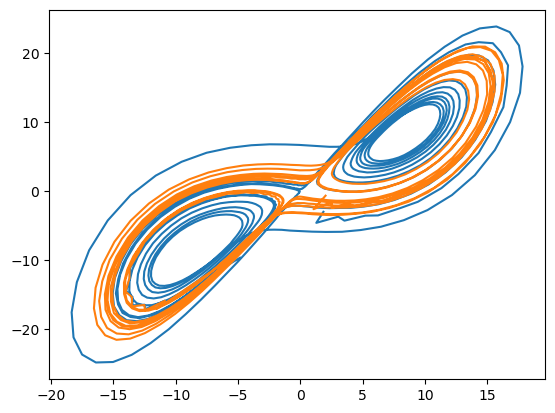

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
from dysts.flows import Lorenz, Hadley

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True,noise=0.01)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

sol2 = model.make_trajectory(1000, resample=True,noise=0.01)

plt.plot(sol2[:, 0], sol2[:, 1])

Let's build some minimal models of transformer self-attention, mamba, and s4d and apply them to this data (for now, untrained)

In [21]:
import sys
import torch
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings")
sys.path.append("/Users/mitchellostrow/Desktop/Projects/NN_delays/nn_delay_embeddings/")
from models import GPT

ImportError: cannot import name 'GPT' from 'models' (unknown location)

In [ ]:
d = 1000
d_model = 10
model = GPT(1,d_model,1,d)

In [ ]:
sol.shape

(1000, 3)

In [ ]:
data = torch.tensor(sol[np.newaxis,:d,0:1]).float()
print(data.size())
out,hidden = model(data)
hidden = hidden.detach().numpy().squeeze()
out.shape,hidden.shape

torch.Size([1, 1000, 1])


(torch.Size([1, 1000, 1]), (1000, 10))

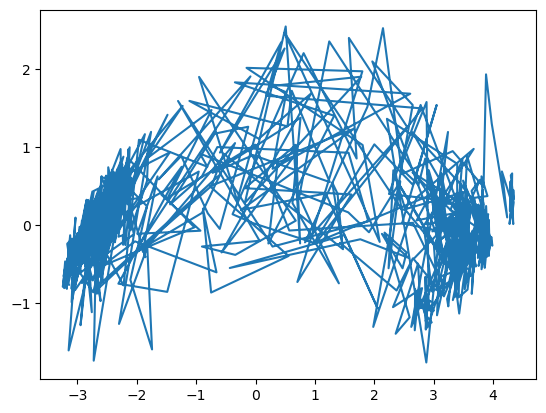

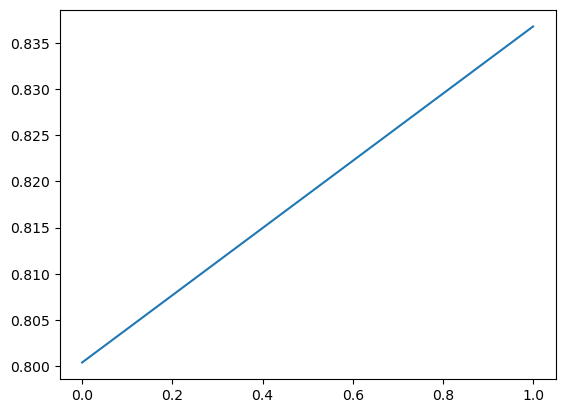

In [ ]:
#run pca on the hidden states
from sklearn.decomposition import PCA

hidden = hidden[50:] #washout the first n

pca = PCA(n_components=2)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1])
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Cool -- so this shows that an untrained transformer, although it receives a delay embedding, does not actually (at initialization) reconstruct the attractor

(20, 1000, 3) torch.Size([20, 1000, 1])
(20, 1000, 3) torch.Size([20, 1000, 1])


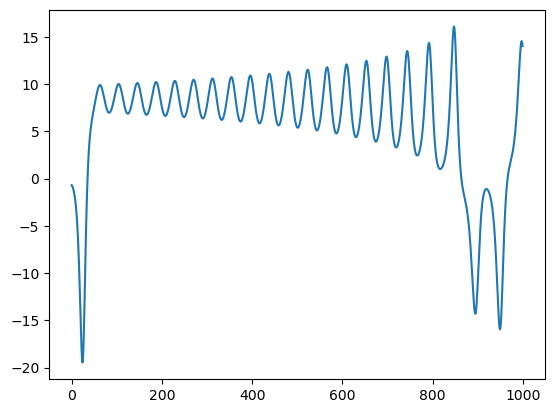

In [6]:
#convert these into dataloaders
from utils import make_dataset

train_loader, val_loader, train_data, val_data = make_dataset(Lorenz,1000,20)
plt.figure()
plt.plot(train_data[0,:1000,0])

In [22]:
from utils import train
from torch.optim import AdamW
import torch.nn as nn
model = GPT(1,100,10,1000)

#model,train_set,val_set,epochs,lr,optimizer,loss_fn,device
model, train_loss, val_loss = train(model, train_loader, val_loader, 50, 1e-3, AdamW, nn.MSELoss(), 'cuda')
plt.plot(train_loss)
plt.plot(val_loss)

NameError: name 'GPT' is not defined

/tmp/ipykernel_14227/2697761255.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float().cuda()


torch.Size([1, 1000, 1])
torch.Size([1, 1000, 1]) (1000, 100)


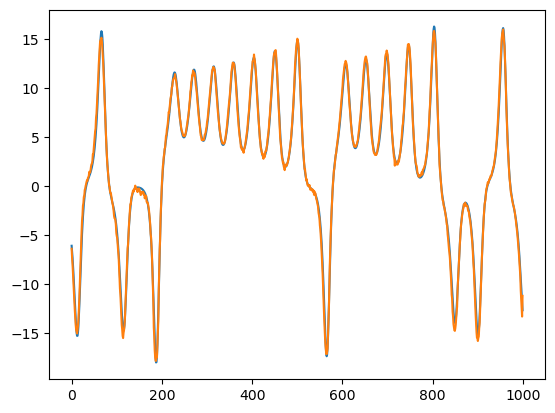

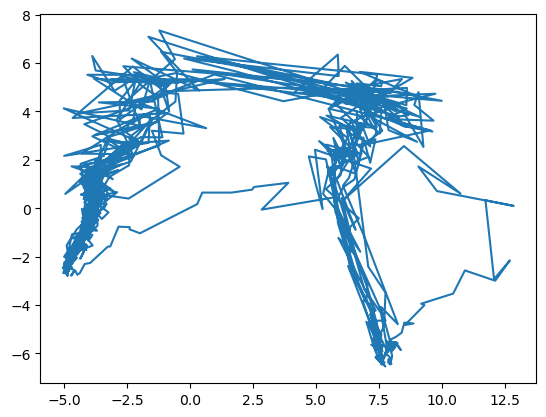

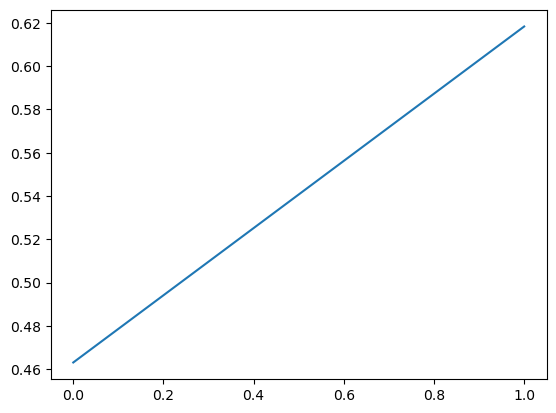

In [12]:
data = next(iter(train_loader))
data = torch.tensor(data).float().cuda()
print(data.size())
plt.figure()
plt.plot(data[0,:,0].cpu())


out,hiddens = model(data)
hidden = hiddens.detach().cpu().numpy().squeeze()
print(out.shape, hidden.shape)
plt.plot(out.detach().cpu().numpy()[0,:,0])

#run pca on the hidden states
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(hidden)
hidden_pca = pca.transform(hidden)
plt.figure()
plt.plot(hidden_pca[:,0],hidden_pca[:,1],label="reconstructed w PCA")
# plt.plot(sol[:,0],sol[:,1],label="original")
plt.figure()
#plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))